In [102]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from sklearn.preprocessing import StandardScaler

In [103]:
#loading the data
tests_df = pd.read_csv('tests_data.csv')
tests_df.head()

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,DATE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE
0,0,0,03-03-2020,0,0,1,100.0,0.0,0,0,0,0,1
1,0,0,03-04-2020,0,0,0,0.0,0.0,0,0,0,0,0
2,0,0,03-05-2020,0,0,0,0.0,0.0,0,0,0,0,0
3,0,0,03-06-2020,0,1,0,0.0,0.0,0,0,0,1,0
4,0,0,03-07-2020,0,0,0,0.0,0.0,0,0,0,0,0


## Preprocessing

In [104]:
#checking the data types
tests_df.dtypes

ANTIGENNEGATIVE               int64
ANTIGENPOSITIVE               int64
DATE                         object
PCRINCONCLUSIVE               int64
PCRNEGATIVE                   int64
PCRPOSITIVE                   int64
POSITIVITYRATE              float64
POSITIVITYRATEROLLINGAVG    float64
SEROLOGYINCONCLUSIVE          int64
SEROLOGYNEGATIVE              int64
SEROLOGYPOSITIVE              int64
TOTALNEGATIVE                 int64
TOTALPOSITIVE                 int64
dtype: object

In [105]:
#creating a new columnd "date" with the date in a proper format
tests_df["date"]=tests_df["DATE"].astype('datetime64')

In [106]:
tests_df.dtypes

ANTIGENNEGATIVE                      int64
ANTIGENPOSITIVE                      int64
DATE                                object
PCRINCONCLUSIVE                      int64
PCRNEGATIVE                          int64
PCRPOSITIVE                          int64
POSITIVITYRATE                     float64
POSITIVITYRATEROLLINGAVG           float64
SEROLOGYINCONCLUSIVE                 int64
SEROLOGYNEGATIVE                     int64
SEROLOGYPOSITIVE                     int64
TOTALNEGATIVE                        int64
TOTALPOSITIVE                        int64
date                        datetime64[ns]
dtype: object

In [107]:
#droping the oroginal date column
tests_df.drop("DATE", axis = 1)

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE,date
0,0,0,0,0,1,100.000000,0.0,0,0,0,0,1,2020-03-03
1,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-04
2,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-05
3,0,0,0,1,0,0.000000,0.0,0,0,0,1,0,2020-03-06
4,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,190,25,0,464,49,9.551657,10.3,0,5,2,659,76,2021-07-13
498,222,22,0,416,48,10.344828,10.7,0,6,1,644,71,2021-07-14
499,172,21,0,293,52,15.072464,11.1,0,2,0,467,73,2021-07-15
500,9,2,0,54,4,6.896552,10.8,0,1,0,64,6,2021-07-16


In [108]:
#creating 2 separate columns for a month and a year to help us better categorize the data
tests_df['month'] = pd.DatetimeIndex(tests_df['date']).month
tests_df['year'] = pd.DatetimeIndex(tests_df['date']).year
no_date = tests_df.drop(["DATE", "date"], axis = 1) #dropping the original date columns since we don't need them any more
no_date

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE,month,year
0,0,0,0,0,1,100.000000,0.0,0,0,0,0,1,3,2020
1,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
2,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
3,0,0,0,1,0,0.000000,0.0,0,0,0,1,0,3,2020
4,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,190,25,0,464,49,9.551657,10.3,0,5,2,659,76,7,2021
498,222,22,0,416,48,10.344828,10.7,0,6,1,644,71,7,2021
499,172,21,0,293,52,15.072464,11.1,0,2,0,467,73,7,2021
500,9,2,0,54,4,6.896552,10.8,0,1,0,64,6,7,2021


In [109]:
#using RFE, selecting the best features to use, selecting those with a score of "1"
from sklearn.feature_selection import RFE
X = no_date.drop('POSITIVITYRATE',axis=1)
y = no_date['POSITIVITYRATE']

reg = LinearRegression()
rfe = RFE(reg,n_features_to_select=7)
rfe_ = rfe.fit(X, y)
print(X.columns)
print(rfe_.support_)
print(rfe.ranking_)

Index(['ANTIGENNEGATIVE', 'ANTIGENPOSITIVE', 'PCRINCONCLUSIVE', 'PCRNEGATIVE',
       'PCRPOSITIVE', 'POSITIVITYRATEROLLINGAVG', 'SEROLOGYINCONCLUSIVE',
       'SEROLOGYNEGATIVE', 'SEROLOGYPOSITIVE', 'TOTALNEGATIVE',
       'TOTALPOSITIVE', 'month', 'year'],
      dtype='object')
[False False  True False False  True  True  True  True False False  True
  True]
[4 3 1 7 2 1 1 1 1 5 6 1 1]


In [110]:
#dropping the columns that are not useful (6 columns); selecting only features that are True, so all with 1
clean_df=no_date.drop(["ANTIGENNEGATIVE", "ANTIGENPOSITIVE","PCRNEGATIVE", 'PCRPOSITIVE',
                       "TOTALNEGATIVE", "TOTALPOSITIVE" ], axis = 1)

In [111]:
clean_df.head()

,PCRINCONCLUSIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,month,year
0,0,100.0,0.0,0,0,0,3,2020
1,0,0.0,0.0,0,0,0,3,2020
2,0,0.0,0.0,0,0,0,3,2020
3,0,0.0,0.0,0,0,0,3,2020
4,0,0.0,0.0,0,0,0,3,2020


<AxesSubplot:>

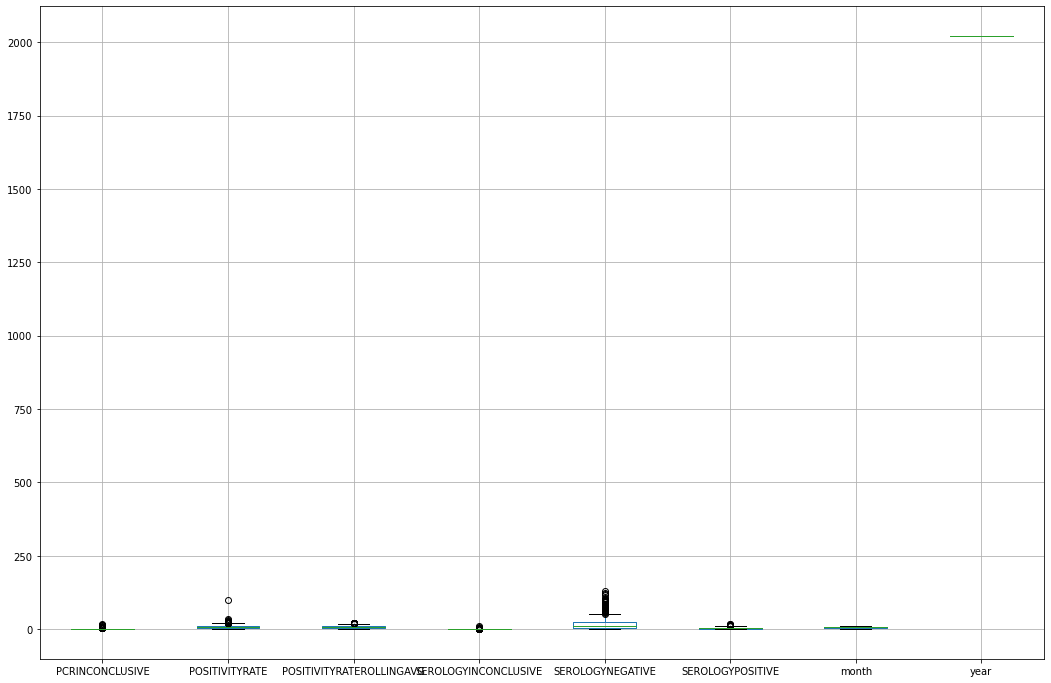

In [112]:
#checking the outliers
clean_df.boxplot(figsize=(18,12))

In [113]:
#revoming the outliers
for x in ['PCRINCONCLUSIVE','POSITIVITYRATE', 'POSITIVITYRATEROLLINGAVG', 'SEROLOGYNEGATIVE','SEROLOGYINCONCLUSIVE', 'SEROLOGYPOSITIVE']:
    q75,q25 = np.percentile(clean_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    clean_df.loc[clean_df[x] < min,x] = np.nan
    clean_df.loc[clean_df[x] > max,x] = np.nan

In [114]:
#removing all NaN values from the dataset
clean2 = clean_df.dropna(axis=0)
clean2

,PCRINCONCLUSIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,month,year
1,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
2,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
3,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
4,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
5,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
...,...,...,...,...,...,...,...,...
497,0.0,9.551657,10.3,0.0,5.0,2.0,7,2021
498,0.0,10.344828,10.7,0.0,6.0,1.0,7,2021
499,0.0,15.072464,11.1,0.0,2.0,0.0,7,2021
500,0.0,6.896552,10.8,0.0,1.0,0.0,7,2021


In [115]:
#schecking the variance
clean2.var()

PCRINCONCLUSIVE               0.523781
POSITIVITYRATE               20.090011
POSITIVITYRATEROLLINGAVG     18.028855
SEROLOGYINCONCLUSIVE          0.000000
SEROLOGYNEGATIVE            140.434563
SEROLOGYPOSITIVE              7.897898
month                        10.988518
year                          0.234891
dtype: float64

In [116]:
#scaling the data because of the high difference between variance of different features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(clean2), columns = clean2.columns)

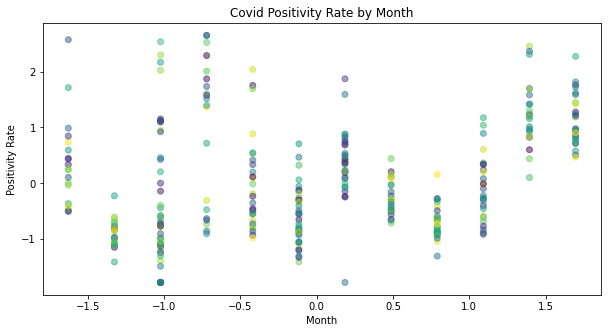

In [148]:
#visualizing the preprocessed data
N = 334
colors = np.random.rand(N)

plt.figure(figsize=(10,5))
plt.scatter(df_scaled['month'], df_scaled['POSITIVITYRATE'], c=colors, alpha=0.5)
plt.title("Covid Positivity Rate by Month") #title
plt.xlabel("Month") #x label
plt.ylabel("Positivity Rate") #y label
plt.show()
#plt.savefig('scatterplot.png')

## Models

For our dataset, we've chosen 3 different data models, 2 of which are supervised and the 3rd on is unsupervised, specifically linear regression and random forest for the supervised ones and k-means for unsupervised one.

### Linear Regression (supervised)

In [118]:
X = df_scaled.drop('POSITIVITYRATE',axis=1)
y = df_scaled['POSITIVITYRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = reg.predict(X_test)
y_pred

array([ 2.05119349, -0.83213644,  0.14927299,  1.06948143, -0.62829749,
       -0.72164506, -0.54640399,  1.18978151,  1.164262  ,  0.80076804,
        0.26071532, -0.37289565, -0.02095677, -0.73172467, -0.94955845,
       -0.68663479, -0.36047792, -0.04400966,  0.25326335, -0.7642058 ,
       -0.32707293, -0.65719921, -0.23475846,  0.86233157, -1.64185746,
       -0.31991002, -0.88415712,  0.17905929,  1.05799896,  0.14661156,
        1.23738558, -0.67173101, -0.33846155,  0.01391437, -0.67418676,
       -0.56189649,  1.56354228, -1.13161475,  0.48538347, -0.62540204,
        1.76465372,  1.05882288,  1.07153615,  1.51379038, -0.418252  ,
        0.06941892, -0.7803485 ,  0.49056734, -0.40390819, -0.66057463,
       -0.13232738, -0.81343978, -0.09424055,  0.48672364, -0.45848912,
       -1.07049757, -1.64185746, -0.51933393,  0.09873172,  1.20061343,
       -0.70834084, -0.18916884, -0.3751733 , -1.64185746,  0.25603102,
       -0.71798253, -0.87159949])

In [120]:
accuracy_score = reg.score(X_test, y_test)
accuracy_score

0.8051887891288244

In [121]:
#checking the accuracy score of train data. The scores are pretty close to each other which means we're 
#not overfitting or underfitting
accuracy_score = reg.score(X_train, y_train)
accuracy_score

0.795148378570134

In [122]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.2167922357362297
0.8051887891288244


### Random Forest (supervised)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(clean2), columns = clean2.columns)
scaled.var()

PCRINCONCLUSIVE             1.003003
POSITIVITYRATE              1.003003
POSITIVITYRATEROLLINGAVG    1.003003
SEROLOGYINCONCLUSIVE        0.000000
SEROLOGYNEGATIVE            1.003003
SEROLOGYPOSITIVE            1.003003
month                       1.003003
year                        1.003003
dtype: float64

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth =3, random_state =42, min_samples_leaf=7)


X = clean2.drop('POSITIVITYRATE',axis=1)
y = clean2['POSITIVITYRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8054665827525811

In [125]:
#checking the accuracy score of train data. The scores are pretty close to each other which means we're 
#not overfitting or underfitting
rf.score(X_train, y_train)

0.8230171543970168

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

80.51231059557203
-2.6120568218126423


In [127]:
y_pred = rf.predict(X_test)
y_pred

array([15.74509835,  2.39889103,  8.64291408, 12.65653149,  5.24895499,
        4.43694346,  5.55457224, 13.79709905, 14.39820483, 11.75696114,
       10.1827398 ,  5.68454972,  7.48470272,  4.74872797,  4.38389623,
        4.60617862,  5.80277416,  6.91670485,  9.9577503 ,  4.74358841,
        5.35666853,  4.89510253,  6.83129866, 11.75696114,  1.96535587,
        5.3767854 ,  4.53223555,  8.99858254, 13.66373287,  8.44753394,
       14.03550843,  4.58528278,  6.68907027,  7.72989132,  4.7348145 ,
        4.86267981, 14.88545707,  2.61648594, 10.30091452,  4.90473841,
       15.70275964, 12.39572373, 12.02022583, 14.78497125,  5.65154682,
        8.64291408,  4.74358841,  9.45831483,  6.02410743,  4.58528278,
        7.02015636,  5.103634  ,  8.89408214, 10.46670665,  5.24895499,
        2.61648594,  1.96535587,  5.73036159,  8.32052788, 13.74361975,
        4.51430678,  7.2378281 ,  5.74208507,  1.96535587,  9.38966423,
        4.19182848,  4.74872797])

### K-Means (unsupervised)

In [128]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [129]:
X = clean2.drop('POSITIVITYRATE',axis=1)
y = clean2['POSITIVITYRATE']

In [130]:
inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'),axis =1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

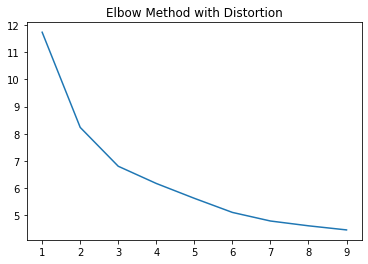

In [131]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

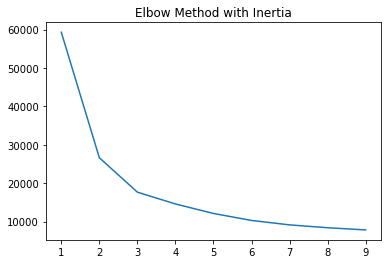

In [132]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

Based on the inertia and distortion graphs, the perfect number of clusters for the model is 3.

In [133]:
#training model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(clean2)

print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 1 1 0 0 2 2 0 0 0 2 2 2 2 2 0 0 0 2 2 2 0 0 2 2 2 0 2 2 0 2 0 0 0 0 2 2
 0 0 2 1 0 2 2 2 0 2 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 2 2 0 0 2 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 2 0 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 2
 0 0 1 0 1 1 2 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


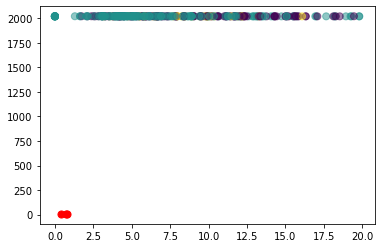

In [134]:
centroids = kmeans.cluster_centers_

plt.scatter(clean2['POSITIVITYRATE'], clean2['year'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [135]:
label = kmeans.fit_predict(clean2)

filtered_label2 = y_kmeans[label == 0]
 
filtered_label8 = y_kmeans[label == 1]

In [136]:
#plt.scatter(filtered_label2 , filtered_label2 , color = 'red')
#plt.scatter(filtered_label8 , filtered_label8, color = 'black')
#plt.show()

### Dendrogram

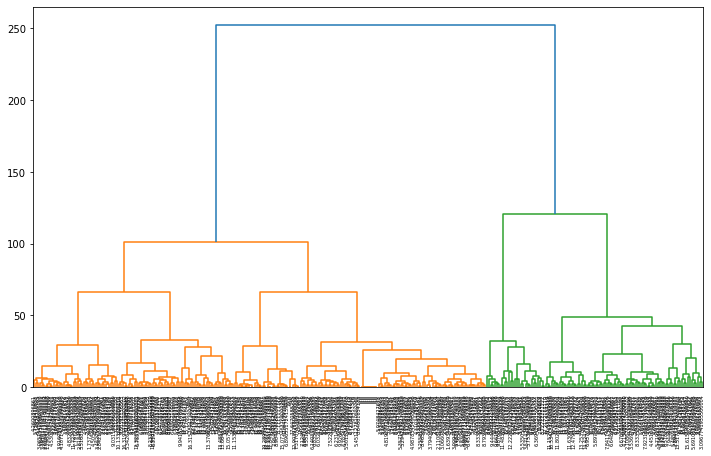

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X,'ward')
plt.figure(figsize=(12,7))

dendro = dendrogram(linked, labels=list(y))
plt.show()

In [138]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

We tried selecting different number of features to check if we could improve the accuracy of our modela and the accuracty didn't change significantly. So we ended up selecting 7 features which showed the best models accuracy.

* jupyter notebook
* etl code
* data model
* A readme.md file in your repo that clearly outlines the techniques used and findings.
* powerpoint (15 mins)